Findings:
1.) Based on the data set provided, 68.2% of all Pyber rides are in an urban city.
2.) There's an inverse correlation between city size and average fare paid, this is largerly due to riders taken shorter trips in more dense city settings, while needing to take longer trips in rural areas. 
3.) There appears to be decent overlap between urban and suburban settings, when looking at total number of rides per city.  But, average fare is higher in suburban settings.  A key take away would be that a Pyber driver may benefit in more takehome pay when working from a suburban setting.  

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load files
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city")
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Group by city to determine total rides by city
pyber_city = pyber_df.groupby(['city'])
rides_by_city = pyber_city["ride_id"].count()
driver_by_city = pyber_city["driver_count"].mean()
avg_fare_by_city = pyber_city["fare"].mean()
city_by_type = pyber_city["type"].unique()

In [3]:
#Set CityType as index 
city_type = city_df.set_index('city')['type']

In [5]:
#create a dataframe to store my calculated data
pyber_city_df = pd.DataFrame({"Average Fare per City":avg_fare_by_city,
                 "Number of Rides": rides_by_city,
                 "Number of Drivers": driver_by_city,
                 "City Type": city_type
})

## Bubble Plot of Ride Sharing Data

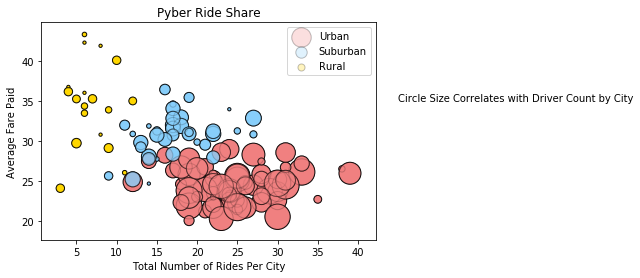

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban_df = pyber_city_df[pyber_city_df["City Type"] == "Urban"]
suburban_df = pyber_city_df[pyber_city_df["City Type"] == "Suburban"]
rural_df = pyber_city_df[pyber_city_df["City Type"] == "Rural"]
urban_df.head()
# Build the scatter plots for each city types
#UrbanScatterPlot
urban = plt.scatter(urban_df["Number of Rides"], urban_df["Average Fare per City"], color = "lightcoral", edgecolors="black", 
            s = urban_df["Number of Drivers"]*10, label="Urban")
#SuburbanScatterPlot
suburban = plt.scatter(suburban_df["Number of Rides"], suburban_df["Average Fare per City"], color = "lightskyblue", edgecolors="black", 
            s = suburban_df["Number of Drivers"]*10, label="Suburban")
#RuralScatterPlot
rural = plt.scatter(rural_df["Number of Rides"], rural_df["Average Fare per City"], color = "gold", edgecolors="black", 
            s = rural_df["Number of Drivers"]*10, label="Rural")

# Incorporate the other graph properties
# Obtain the x and y coordinates for each of the three city types
urban_df = pyber_city_df[pyber_city_df["City Type"] == "Urban"]
suburban_df = pyber_city_df[pyber_city_df["City Type"] == "Suburban"]
rural_df = pyber_city_df[pyber_city_df["City Type"] == "Rural"]
urban_df.head()
# Build the scatter plots for each city types
#UrbanScatterPlot - create as a handle (urban =) so we can set legend
urban = plt.scatter(urban_df["Number of Rides"], urban_df["Average Fare per City"], color = "lightcoral", edgecolors="black", 
            s = urban_df["Number of Drivers"]*10, alpha=0.25, label="Urban")
#SuburbanScatterPlot
suburban = plt.scatter(suburban_df["Number of Rides"], suburban_df["Average Fare per City"], color = "lightskyblue", edgecolors="black", 
            s = suburban_df["Number of Drivers"]*10, alpha=0.25, label="Suburban")
#RuralScatterPlot
rural = plt.scatter(rural_df["Number of Rides"], rural_df["Average Fare per City"], color = "gold", edgecolors="black", 
            s = rural_df["Number of Drivers"]*10, alpha=0.25, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Share")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare Paid")
# Create a legend - call handles
plt.legend(handles = [urban, suburban, rural], loc="best")
# Incorporate a text label regarding circle size
plt.text(45, 35, "Circle Size Correlates with Driver Count by City")
# Save Figure
plt.savefig("../Images/PyberRideShare.png")

## Total Fares by City Type

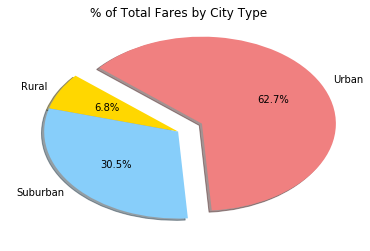

In [10]:
# Calculate Type Percents
fares_by_type = pyber_df.groupby('type')["fare"].sum()

# Build Pie Chart
explode = (0, 0, 0.2)
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
plt.title("% of Total Fares by City Type")
plt.pie(fares_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("../Images/FaresByCityType.png")
plt.show()

## Total Rides by City Type

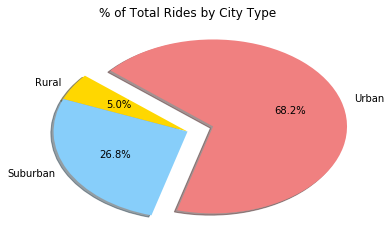

In [8]:
# Calculate Type Percents
rides_by_type = pyber_df.groupby('type')["ride_id"].sum()

# Build Pie Chart
explode = (0, 0, 0.2)
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
plt.title("% of Total Rides by City Type")
plt.pie(rides_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("../Images/RidesByCityType.png")
plt.show()

## Total Drivers by City Type

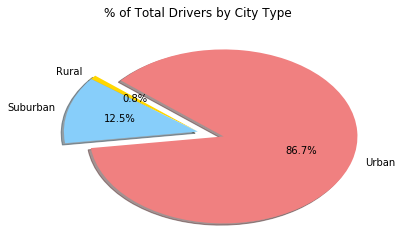

In [11]:
# Calculate Type Percents
drivers_by_type = pyber_df.groupby('type')["driver_count"].sum()

# Build Pie Chart
explode = (0, 0, 0.2)
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("../Images/DriversByCityType.png")
plt.show()